# Import and Instal Dependencies

In [1]:
# !pip install seaborn

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2024-06-05 15:42:23.743832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 15:42:25.019588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-06-05 15:42:28.691241: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-05 15:42:28.882373: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-05 15:42:28.882441: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# Gathering Data

## Export Data

In [4]:
csv_path = '../dataset/momentum_v2.csv' # where the file located

dataset = pd.read_csv(csv_path) # read csv file
dataset

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,-0.070021,-0.641563,-0.003270,0.999999,-0.089574,-0.676247,0.021132,1.000000,-0.089190,...,-0.066582,0.893120,0.313258,0.805903,-0.036581,0.952736,0.193033,0.822077,-0.187799,0.981102
1,0,-0.010543,-0.655224,0.094212,0.999999,0.008622,-0.679027,0.110204,0.999999,0.008737,...,-0.079724,0.865470,-0.177784,0.819042,-0.246616,0.951719,-0.288667,0.796042,-0.176998,0.965385
2,0,-0.070021,-0.641563,-0.003270,0.999999,-0.089574,-0.676247,0.021132,1.000000,-0.089190,...,-0.066582,0.893120,0.313258,0.805903,-0.036581,0.952736,0.193033,0.822077,-0.187799,0.981102
3,0,-0.062275,-0.641563,0.032179,0.999999,-0.067008,-0.676247,0.063088,1.000000,-0.066275,...,-0.120128,0.893120,0.252999,0.805903,-0.188309,0.952736,0.073272,0.822077,-0.259155,0.981102
4,0,-0.037842,-0.641563,0.059005,0.999999,-0.026486,-0.676247,0.088140,1.000000,-0.025602,...,-0.141485,0.893120,0.124949,0.805903,-0.289580,0.952736,-0.066122,0.822077,-0.261071,0.981102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11545,1,-0.218273,-0.533739,-0.329626,0.999680,-0.232653,-0.548931,-0.336422,0.999680,-0.233077,...,-0.013038,0.874598,0.680858,0.520311,0.151647,0.912014,0.630965,0.549737,0.004292,0.899593
11546,1,-0.353843,-0.533739,-0.176328,0.999680,-0.369694,-0.548931,-0.175023,0.999680,-0.370490,...,-0.267580,0.874598,0.665464,0.520311,-0.209099,0.912014,0.548577,0.549737,-0.311765,0.899593
11547,1,-0.394601,-0.533739,0.024217,0.999680,-0.407676,-0.548931,0.033272,0.999680,-0.408631,...,-0.450425,0.874598,0.471759,0.520311,-0.513817,0.912014,0.319199,0.549737,-0.544285,0.899593
11548,1,-0.329626,-0.533739,0.218273,0.999680,-0.336422,-0.548931,0.232653,0.999680,-0.337279,...,-0.512579,0.874598,0.151647,0.520311,-0.680858,0.912014,0.004292,0.549737,-0.630965,0.899593


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Columns: 133 entries, class to v33
dtypes: float64(132), int64(1)
memory usage: 11.7 MB


This dataset has 11550 rows with 2 class.
- 0 => Not Using Momentum
- 1 => Using Momentum

# Assessing Data

In [6]:
# check information about dataset
dataset.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   11550 non-null  int64  
 1    x1      11550 non-null  float64
 2    y1      11550 non-null  float64
 3    z1      11550 non-null  float64
 4    v1      11550 non-null  float64
 5    x2      11550 non-null  float64
 6    y2      11550 non-null  float64
 7    z2      11550 non-null  float64
 8    v2      11550 non-null  float64
 9    x3      11550 non-null  float64
 10   y3      11550 non-null  float64
 11   z3      11550 non-null  float64
 12   v3      11550 non-null  float64
 13   x4      11550 non-null  float64
 14   y4      11550 non-null  float64
 15   z4      11550 non-null  float64
 16   v4      11550 non-null  float64
 17   x5      11550 non-null  float64
 18   y5      11550 non-null  float64
 19   z5      11550 non-null  float64
 20   v5      11550 non-null  float64
 21   x6      11

In [7]:
# check for null value
dataset.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [8]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 825 rows


Found 825 rows of duplicated value

In [9]:
# Drop Duplicated data
dataset.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 0 rows


# Data Preprocessing

In [10]:
# Check Ratio For the labels
for i in range(2):
    print("Class {} : {}".format(i, dataset['class'].value_counts()[i]))

Class 0 : 4771
Class 1 : 5954


The dataset is imbalanced, so we try to solve it with the downsampling method.

In [12]:
# Dividing the dataset based on class
not_momentum_dataset = dataset[dataset['class']==0]
momentum_dataset = dataset[dataset['class']==1]


print(not_momentum_dataset.shape)
print(momentum_dataset.shape)


(4771, 133)
(5954, 133)


In [14]:
# Balancing the data by minority class, which is close dataset
from sklearn.utils import resample

momentum_dataset = resample(momentum_dataset,
                          replace = True,
                          n_samples = len(not_momentum_dataset),
                          random_state=42)

In [15]:
print(not_momentum_dataset.shape)
print(momentum_dataset.shape)

(4771, 133)
(4771, 133)


class
0    4771
1    4771
Name: count, dtype: int64


<Axes: ylabel='Type'>

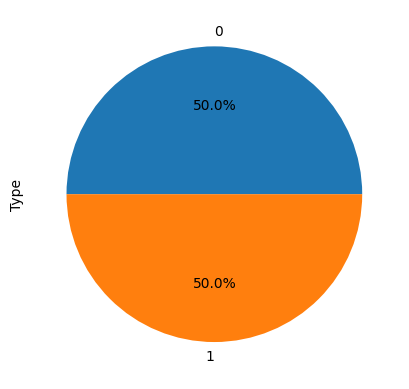

In [17]:
dataset_balanced = pd.concat([not_momentum_dataset, momentum_dataset], ignore_index=True)

print(dataset_balanced["class"].value_counts())

dataset_balanced.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Dataset Balanced!**

## Feature Engineering

In [18]:
dataset_balanced

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,-0.070021,-0.641563,-0.003270,0.999999,-0.089574,-0.676247,0.021132,1.000000,-0.089190,...,-0.066582,0.893120,0.313258,0.805903,-0.036581,0.952736,0.193033,0.822077,-0.187799,0.981102
1,0,-0.010543,-0.655224,0.094212,0.999999,0.008622,-0.679027,0.110204,0.999999,0.008737,...,-0.079724,0.865470,-0.177784,0.819042,-0.246616,0.951719,-0.288667,0.796042,-0.176998,0.965385
2,0,-0.062275,-0.641563,0.032179,0.999999,-0.067008,-0.676247,0.063088,1.000000,-0.066275,...,-0.120128,0.893120,0.252999,0.805903,-0.188309,0.952736,0.073272,0.822077,-0.259155,0.981102
3,0,-0.037842,-0.641563,0.059005,0.999999,-0.026486,-0.676247,0.088140,1.000000,-0.025602,...,-0.141485,0.893120,0.124949,0.805903,-0.289580,0.952736,-0.066122,0.822077,-0.261071,0.981102
4,0,-0.003270,-0.641563,0.070021,0.999999,0.021132,-0.676247,0.089574,1.000000,0.021931,...,-0.124932,0.893120,-0.036581,0.805903,-0.313258,0.952736,-0.187799,0.822077,-0.193033,0.981102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,0.168935,-0.645435,0.068012,0.997262,0.148014,-0.678805,0.069438,0.997036,0.146924,...,0.135598,0.794635,-0.142934,0.704776,0.251201,0.600813,-0.274945,0.722793,0.152958,0.704398
9538,1,0.064984,-0.637551,-0.114394,0.999945,0.082328,-0.671771,-0.101809,0.999904,0.082607,...,0.108305,0.662728,0.127707,0.830367,-0.025153,0.922018,-0.110903,0.828027,0.050223,0.887048
9539,1,-0.039616,-0.617353,-0.091749,0.999655,-0.030622,-0.650884,-0.086516,0.999360,-0.029969,...,0.095685,0.831578,-0.310972,0.510838,-0.100499,0.926144,-0.335932,0.501808,0.083491,0.906832
9540,1,0.010850,-0.606866,0.095423,0.999974,0.004203,-0.639459,0.114760,0.999963,0.003893,...,-0.200896,0.808906,0.255383,0.819996,-0.166371,0.923628,0.049555,0.823020,-0.321144,0.919527


The output of the mediapipe consists of 33 coordinate points from head to toe. Each point will have 4 values, namely `X, Y, and Z` (For point coordinates) and `visibility` for the value of the point confidence.

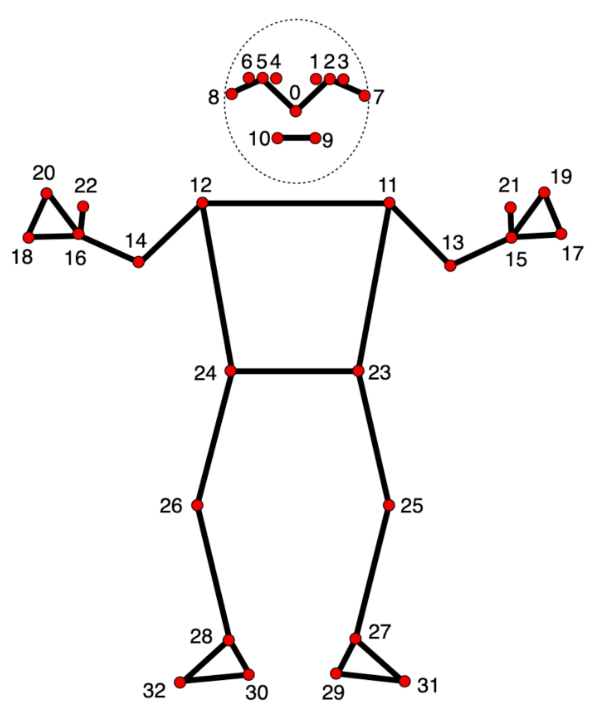

In [19]:
# see corelation map each data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataset_balanced.corr())

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
class,1.000000,0.006405,0.222710,-0.034601,-0.346686,0.003403,0.192705,-0.033628,-0.379168,0.003384,0.192185,-0.033545,-0.390211,0.003425,0.192666,-0.033530,-0.387541,0.002858,0.199532,-0.036872,-0.362457,0.002856,0.200504,-0.036867,-0.372632,0.002877,0.199658,-0.036870,-0.362377,-0.002572,0.078716,-0.021312,-0.399838,-0.004521,0.091109,-0.032468,-0.375055,0.004479,0.189905,-0.031772,-0.302731,0.003813,0.195045,-0.037071,-0.324157,-3.788979e-03,-0.022035,-0.007882,-0.264383,0.000061,0.003917,-0.031488,-0.047742,-0.001099,-0.094956,0.000019,0.026744,0.002227,-0.023113,-0.027355,0.074399,0.001672,-0.110443,-0.003072,0.109867,-0.002269,-0.049258,-0.025101,0.114374,0.002236,-0.124013,-0.003998,0.153069,-0.003614,-0.070437,-0.026017,0.191178,0.001297,-0.121524,-0.004894,0.163329,-0.004677,-0.081909,-0.026001,0.188725,0.001525,-0.112401,-0.003912,0.189659,-0.002834,-0.057720,-0.025627,0.190222,-0.001497,0.109318,0.020840,-1.512775e-01,0.001534,-0.110719,-0.020722,-0.163577,0.025311,-0.333585,0.015248,0.200712,0.012356,-0.340569,-0.016497,0.255597,0.009174,-0.378554,0.021939,-0.099721,-0.000144,-0.420295,0.001852,-0.082324,0.007969,-0.374891,0.022196,-0.002560,-0.000952,-0.417846,0.003207,0.036744,0.012207,-0.333793,0.022865,-0.171738,0.005498,-0.375740,0.006490,-0.124851
x1,0.006405,1.000000,-0.000727,-0.014216,-0.017297,0.986201,0.002279,0.006143,-0.013545,0.985508,0.002252,0.007351,-0.013065,0.985503,0.002312,0.007355,-0.014143,0.971866,0.001596,-0.016188,-0.013510,0.973204,0.001583,-0.016195,-0.012171,0.972232,0.001609,-0.015543,-0.013903,0.743982,0.011659,0.101848,-0.012312,0.662703,0.006553,0.021462,-0.011116,0.962588,0.001185,0.041719,-0.013279,0.966052,0.000340,0.006743,-0.016100,6.074402e-01,-0.001556,0.132803,-0.020712,0.427317,0.002270,0.039283,-0.009608,0.579631,-0.007789,0.102317,-0.013159,0.248382,-0.003004,0.001664,-0.006915,0.565713,-0.005227,0.103429,-0.012297,0.284498,-0.000687,0.001770,-0.009307,0.578167,-0.005000,0.096853,-0.014320,0.326996,-0.000741,-0.001447,-0.008091,0.601013,-0.004284,0.092653,-0.014644,0.335074,-0.000711,0.019190,-0.008386,0.579939,-0.004881,0.102120,-0.013606,0.304608,-0.000714,0.010744,-0.008705,0.169461,0.002022,0.075520,-2.290609e-03,-0.171401,-0.001805,-0.074112,-0.001611,-0.275545,0.001123,-0.030289,-0.001231,-0.422861,-0.005627,-0.106311,0.000020,-0.491015,-0.010512,0.162994,-0.011854,-0.622122,-0.016111,0.092933,-0.011336,-0.489826,-0.011216,0.171772,-0.003593,-0.618168,-0.016410,0.101139,-0.001332,-0.402423,-0.012051,0.113113,-0.011248,-0.519390,-0.016691,0.043196,-0.009030
y1,0.222710,-0.000727,1.000000,0.035373,0.152104,0.000497,0.990020,0.032898,0.135979,0.000489,0.989952,0.032801,0.160813,0.000560,0.989941,0.032792,0.125325,0.001959,0.992621,0.034426,0.110548,0.001881,0.992663,0.034499,0.118424,0.001899,0.992583,0.034476,0.085613,0.000917,0.853906,0.020392,0.140236,0.005703,0.872106,0.025098,0.152977,-0.000596,0.987995,0.032239,0.142696,0.001424,0.990714,0.035104,0.128175,-1.687926e-03,0.765604,0.019125,0.251880,0.010205,0.735481,0.021746,0.259966,-0.001561,0.599752,0.012658,-0.020216,0.009951,0.581447,0.018693,-0.070015,-0.000499,0.557145,0.010543,-0.042019,0.009340,0.540210,0.021247,-0.042089,0.000504,0.548515,0.012290,-0.023697,0.008895,0.531031,0.023545,-0.054124,0.002149,0.549447,0.014195,-0.039784,0.008396,0.531602,0.023184,-0.066041,0.000303,0.556827,0.011605,-0.092940,0.008973,0.537771,0.021842,-0.112912,-0.010491,-0.130659,0.002148,-1.057404e-01,0.010563,0.138580,-0.002455,-0.07885

Feature `v`s (`visibility`) have small correlation to class feature. So, we can drop them from the table. 

In [20]:
# Find all visibility columns
columns = dataset_balanced.columns
columns_to_drop = [column for column in columns if column.startswith('v')]
print(columns_to_drop)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33']


In [21]:
# Drop v columns
dataset_xyz = dataset_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_xyz

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,-0.070021,-0.641563,-0.003270,-0.089574,-0.676247,0.021132,-0.089190,-0.676668,0.021931,...,0.051201,0.124932,0.801205,-0.066582,0.313258,0.805903,-0.036581,0.193033,0.822077,-0.187799
1,0,-0.010543,-0.655224,0.094212,0.008622,-0.679027,0.110204,0.008737,-0.679462,0.111126,...,-0.153368,-0.195211,0.785102,-0.079724,-0.177784,0.819042,-0.246616,-0.288667,0.796042,-0.176998
2,0,-0.062275,-0.641563,0.032179,-0.067008,-0.676247,0.063088,-0.066275,-0.676668,0.063588,...,-0.066256,0.074903,0.801205,-0.120128,0.252999,0.805903,-0.188309,0.073272,0.822077,-0.259155
3,0,-0.037842,-0.641563,0.059005,-0.026486,-0.676247,0.088140,-0.025602,-0.676668,0.088206,...,-0.165959,0.004804,0.801205,-0.141485,0.124949,0.805903,-0.289580,-0.066122,0.822077,-0.261071
4,0,-0.003270,-0.641563,0.070021,0.021132,-0.676247,0.089574,0.021931,-0.676668,0.089190,...,-0.221194,-0.066582,0.801205,-0.124932,-0.036581,0.805903,-0.313258,-0.187799,0.822077,-0.193033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,0.168935,-0.645435,0.068012,0.148014,-0.678805,0.069438,0.146924,-0.679351,0.069321,...,0.222823,-0.338431,0.627817,0.135598,-0.142934,0.704776,0.251201,-0.274945,0.722793,0.152958
9538,1,0.064984,-0.637551,-0.114394,0.082328,-0.671771,-0.101809,0.082607,-0.672274,-0.101139,...,0.071884,-0.062566,0.732935,0.108305,0.127707,0.830367,-0.025153,-0.110903,0.828027,0.050223
9539,1,-0.039616,-0.617353,-0.091749,-0.030622,-0.650884,-0.086516,-0.029969,-0.651401,-0.085611,...,-0.091073,-0.277094,0.425727,0.095685,-0.310972,0.510838,-0.100499,-0.335932,0.501808,0.083491
9540,1,0.010850,-0.606866,0.095423,0.004203,-0.639459,0.114760,0.003893,-0.639864,0.115403,...,-0.035469,0.038967,0.774100,-0.200896,0.255383,0.819996,-0.166371,0.049555,0.823020,-0.321144


Now we only have dataset with XYZ coordinates

## Feature Selection

Because, we predict momentum while doing pull-ups, all coordinates are matter. So, we don't try to drop some columns.

In [23]:
# dataset xyz
dataset_xyz # complete dataset

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,-0.070021,-0.641563,-0.003270,-0.089574,-0.676247,0.021132,-0.089190,-0.676668,0.021931,...,0.051201,0.124932,0.801205,-0.066582,0.313258,0.805903,-0.036581,0.193033,0.822077,-0.187799
1,0,-0.010543,-0.655224,0.094212,0.008622,-0.679027,0.110204,0.008737,-0.679462,0.111126,...,-0.153368,-0.195211,0.785102,-0.079724,-0.177784,0.819042,-0.246616,-0.288667,0.796042,-0.176998
2,0,-0.062275,-0.641563,0.032179,-0.067008,-0.676247,0.063088,-0.066275,-0.676668,0.063588,...,-0.066256,0.074903,0.801205,-0.120128,0.252999,0.805903,-0.188309,0.073272,0.822077,-0.259155
3,0,-0.037842,-0.641563,0.059005,-0.026486,-0.676247,0.088140,-0.025602,-0.676668,0.088206,...,-0.165959,0.004804,0.801205,-0.141485,0.124949,0.805903,-0.289580,-0.066122,0.822077,-0.261071
4,0,-0.003270,-0.641563,0.070021,0.021132,-0.676247,0.089574,0.021931,-0.676668,0.089190,...,-0.221194,-0.066582,0.801205,-0.124932,-0.036581,0.805903,-0.313258,-0.187799,0.822077,-0.193033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,1,0.168935,-0.645435,0.068012,0.148014,-0.678805,0.069438,0.146924,-0.679351,0.069321,...,0.222823,-0.338431,0.627817,0.135598,-0.142934,0.704776,0.251201,-0.274945,0.722793,0.152958
9538,1,0.064984,-0.637551,-0.114394,0.082328,-0.671771,-0.101809,0.082607,-0.672274,-0.101139,...,0.071884,-0.062566,0.732935,0.108305,0.127707,0.830367,-0.025153,-0.110903,0.828027,0.050223
9539,1,-0.039616,-0.617353,-0.091749,-0.030622,-0.650884,-0.086516,-0.029969,-0.651401,-0.085611,...,-0.091073,-0.277094,0.425727,0.095685,-0.310972,0.510838,-0.100499,-0.335932,0.501808,0.083491
9540,1,0.010850,-0.606866,0.095423,0.004203,-0.639459,0.114760,0.003893,-0.639864,0.115403,...,-0.035469,0.038967,0.774100,-0.200896,0.255383,0.819996,-0.166371,0.049555,0.823020,-0.321144


# Build Model

## Dataset XYZ

In [24]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xyz.iloc[:, 1:]
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.3, random_state=42, stratify=label)

In [25]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [30]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 99)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,698 (92.57 KB)

 Trainable params: 23,698 (92.57 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100


I0000 00:00:1717577514.219784    5831 service.cc:145] XLA service 0x7fd7a00016c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717577514.219837    5831 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-06-05 15:51:54.273450: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-05 15:51:54.540318: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 68/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5468 - loss: 0.6821

I0000 00:00:1717577516.418217    5831 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


209/209 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.6430 - loss: 0.6196 - val_accuracy: 0.8386 - val_loss: 0.4015
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4117 - val_accuracy: 0.8386 - val_loss: 0.3696
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.3657 - val_accuracy: 0.8659 - val_loss: 0.3310
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3399 - val_accuracy: 0.8659 - val_loss: 0.2963
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8738 - loss: 0.2947 - val_accuracy: 0.8743 - val_loss: 0.2816
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8778 - loss: 0.2847 - val_accuracy: 0.8722 - val_loss: 0.2758
Epoch 7/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8827 - loss: 0.2612 - val_accuracy: 0.8631 - val_loss: 0.2922
Epoch 8/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8924 - loss: 0.2443 - val_accuracy: 0.89

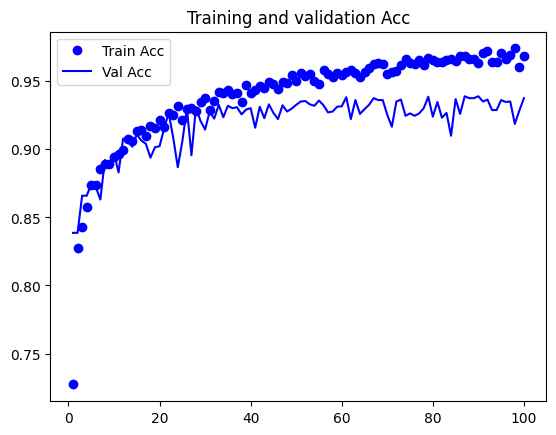

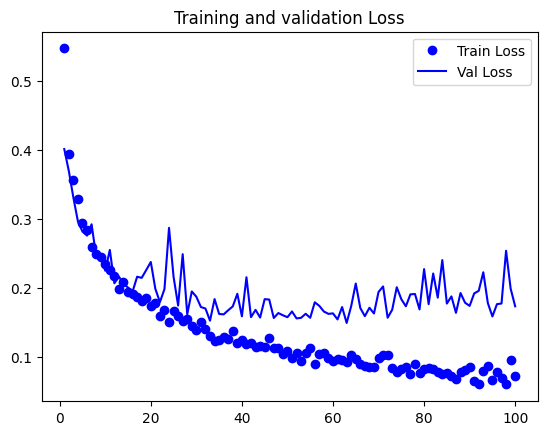

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [34]:
dir_path = '../model/xyz/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../model/xyz/assets


INFO:tensorflow:Assets written to: ../model/xyz/assets


## Dataset XYZ Elbows to Hands

In [49]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_hand
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [50]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [52]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,883 (58.14 KB)

 Trainable params: 14,883 (58.14 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.4663 - loss: 1.0031 - val_accuracy: 0.7679 - val_loss: 0.6075
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.5463 - val_accuracy: 0.8150 - val_loss: 0.4088
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8212 - loss: 0.4130 - val_accuracy: 0.8255 - val_loss: 0.4154
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8546 - loss: 0.3539 - val_accuracy: 0.8726 - val_loss: 0.3392
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3380 - val_accuracy: 0.8883 - val_loss: 0.2974
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3089 - val_accuracy: 0.8691 - val_loss: 0.3259
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.2997 - val_accuracy: 0.8970 - val_loss: 0.2828
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9034 - loss: 0.2588 - val_accuracy: 0.9162 - 

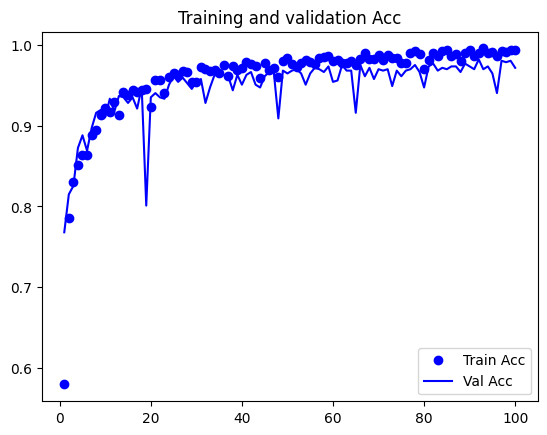

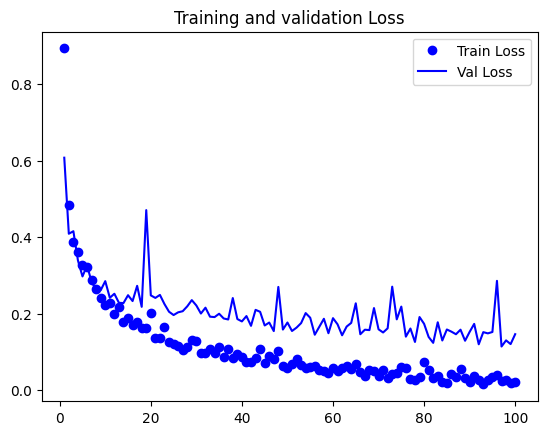

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [56]:
dir_path = '../Model/xyz_hand/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xyz_hand/assets


INFO:tensorflow:Assets written to: ../Model/xyz_hand/assets


## Dataset XY

In [67]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xy.iloc[:, 1:] 
label = dataset_xy.iloc[:, :1] 

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [68]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [70]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,491 (76.14 KB)

 Trainable params: 19,491 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.4185 - loss: 1.0889 - val_accuracy: 0.6754 - val_loss: 0.9759
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.8956 - val_accuracy: 0.7871 - val_loss: 0.6238
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 0.5753 - val_accuracy: 0.7522 - val_loss: 0.5070
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.4253 - val_accuracy: 0.8412 - val_loss: 0.4005
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.3823 - val_accuracy: 0.9092 - val_loss: 0.3144
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.3311 - val_accuracy: 0.8970 - val_loss: 0.2972
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8928 - loss: 0.2910 - val_accuracy: 0.8813 - val_loss: 0.3056
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2455 - val_accuracy: 0.9442 - 

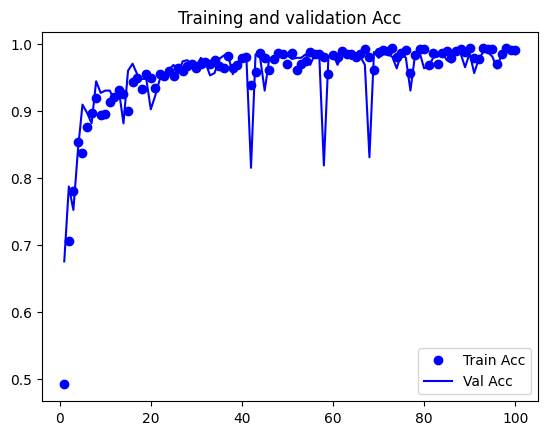

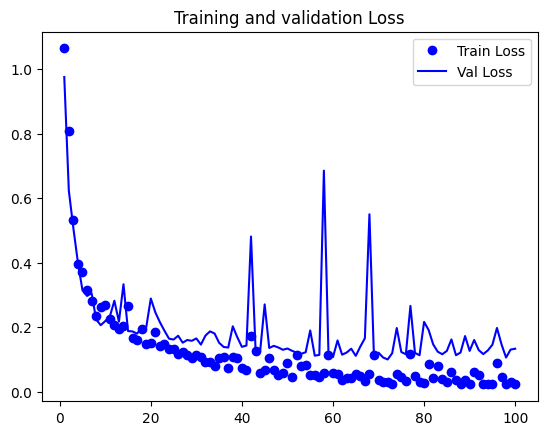

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [74]:
dir_path = '../Model/xy/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xy/assets


INFO:tensorflow:Assets written to: ../Model/xy/assets


## Dataset XY Elbows to Hands

In [78]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xy_hand
label = dataset_xy.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.2, random_state=42, stratify=label)

In [79]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [81]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,603 (53.14 KB)

 Trainable params: 13,603 (53.14 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.4307 - loss: 1.0659 - val_accuracy: 0.5410 - val_loss: 0.8655
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.7400 - val_accuracy: 0.8290 - val_loss: 0.5142
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.4845 - val_accuracy: 0.8202 - val_loss: 0.4334
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.4228 - val_accuracy: 0.8010 - val_loss: 0.4290
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8146 - loss: 0.4063 - val_accuracy: 0.8691 - val_loss: 0.3702
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.3893 - val_accuracy: 0.8220 - val_loss: 0.3880
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8276 - loss: 0.3706 - val_accuracy: 0.8342 - val_loss: 0.3764
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8273 - loss: 0.3682 - val_accuracy: 0.7923 - 

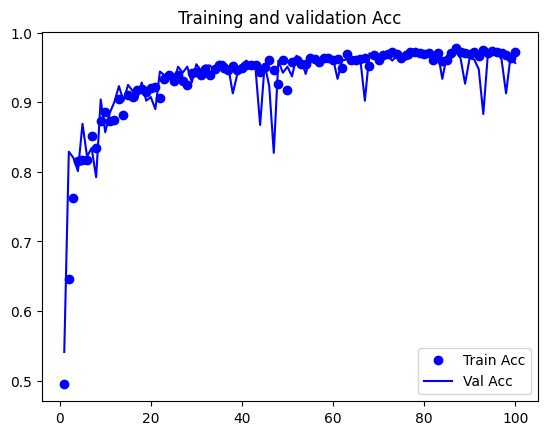

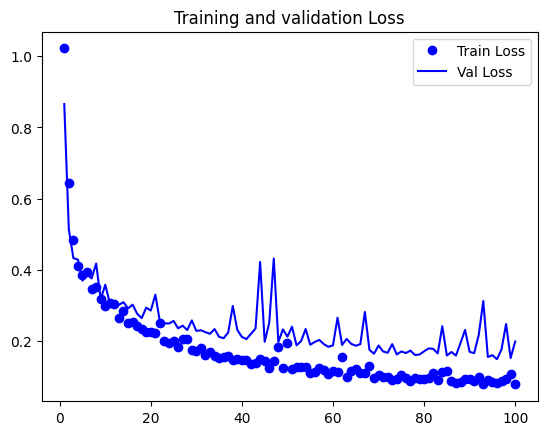

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [85]:
dir_path = '../Model/xy_hand/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../Model/xy_hand/assets


INFO:tensorflow:Assets written to: ../Model/xy_hand/assets
